In [1]:
import sys

print("Python executable used by this notebook:")
print(sys.executable)

# Install into THIS Python environment
%pip install datasets pandas


Python executable used by this notebook:
/opt/anaconda3/bin/python
  Using cached https://files.pythonhosted.org/packages/be/e3/a84bf2e561beed15813080d693b4b27573262433fced9c1d1fea59e60553/dill-0.3.6-py3-none-any.whl
ERROR: multiprocess 0.70.15 has requirement dill>=0.3.7, but you'll have dill 0.3.6 which is incompatible.
  Found existing installation: dill 0.3.7
    Uninstalling dill-0.3.7:
      Successfully uninstalled dill-0.3.7
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset(
    "McAuley-Lab/Amazon-Reviews-2023",
    "raw_review_Electronics", # you can change this to other configs
    split="full",
)

df = dataset.to_pandas()

In [8]:
df.shape

(43886944, 10)

In [9]:
import os

# save as csv.gz for future uses
save_path = "/Users/scott/Desktop/amazon_reviews_electronics.csv.gz"

df.to_csv(save_path, index=False, compression="gzip")

save_path

'/Users/scott/Desktop/amazon_reviews_electronics.csv.gz'

In [2]:
import pandas as pd

path = "/Users/scott/Desktop/amazon_reviews_electronics.csv.gz"

df = pd.read_csv(path)  # pandas auto-detects gzip
# df = pd.read_csv(path, compression="gzip")


In [5]:
df.shape # 40m of reviews

(43886944, 10)

In [6]:
df.head(5)

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,3.0,Smells like gasoline! Going back!,First & most offensive: they reek of gasoline ...,"[{'attachment_type': 'IMAGE', 'large_image_url...",B083NRGZMM,B083NRGZMM,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1658185117948,0,True
1,1.0,Didn’t work at all lenses loose/broken.,These didn’t work. Idk if they were damaged in...,[],B07N69T6TM,B07N69T6TM,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1592678549731,0,True
2,5.0,Excellent!,I love these. They even come with a carry case...,[],B01G8JO5F2,B01G8JO5F2,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1523093017534,0,True
3,5.0,Great laptop backpack!,I was searching for a sturdy backpack for scho...,[],B001OC5JKY,B001OC5JKY,AGGZ357AO26RQZVRLGU4D4N52DZQ,1290278495000,18,True
4,5.0,Best Headphones in the Fifties price range!,I've bought these headphones three times becau...,[],B013J7WUGC,B07CJYMRWM,AG2L7H23R5LLKDKLBEF2Q3L2MVDA,1676601581238,0,True


In [8]:
df.verified_purchase.value_counts() # bout 8% of reviews are unverified

True     40546884
False     3340060
Name: verified_purchase, dtype: int64

In [9]:
# Unverified reviews still express sentiment, but the quality is lower and noise higher.
# It doesn’t hurt representativeness
# It reduces sampling bias
# It makes sample cleaner
df_verified = df[df['verified_purchase'] == True]
df_verified.shape

(40546884, 10)

In [22]:
# keep a copy
df = df_verified.copy()

In [23]:
type(df)

pandas.core.frame.DataFrame

In [24]:
df = df[['rating', 'text']]
type(df)

pandas.core.frame.DataFrame

In [25]:
df.columns  # -> ['rating', 'text']

Index(['rating', 'text'], dtype='object')

In [26]:
df = df.dropna()
type(df)

pandas.core.frame.DataFrame

In [27]:
df.shape

(40536366, 2)

In [28]:
# drop duplicated value
df = df.drop_duplicates()
type(df)
df.shape

(35296920, 2)

In [29]:
40536366 - 35296920

5239446

In [30]:
df.rating.value_counts()

5.0    21687993
4.0     4584379
1.0     4543929
3.0     2511409
2.0     1969208
0.0           2
Name: rating, dtype: int64

In [31]:
df = df[df['rating'].between(1, 5)]
df['rating'] = df['rating'].astype(int)
df.rating.value_counts()

5    21687993
4     4584379
1     4543929
3     2511409
2     1969208
Name: rating, dtype: int64

In [35]:
df.rating.describe()

count    3.529692e+07
mean     4.045511e+00
std      1.437113e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [8]:
# count by percentage

def rating_distribution(df, rating_col='rating'):
    
    # Prints count and percentage for each rating value in a DataFrame.
    counts = df[rating_col].value_counts().sort_index()
    percentages = (counts / counts.sum() * 100).round(2)
    
    dist_df = pd.DataFrame({
        'count': counts,
        'percentage': percentages
    })
    
    return dist_df

In [37]:
rating_distribution(df)

,count,percentage
1,4543929,12.87
2,1969208,5.58
3,2511409,7.12
4,4584379,12.99
5,21687993,61.44


In [39]:
df.head(10)

,rating,text
0,3,First & most offensive: they reek of gasoline ...
1,1,These didn’t work. Idk if they were damaged in...
2,5,I love these. They even come with a carry case...
3,5,I was searching for a sturdy backpack for scho...
4,5,I've bought these headphones three times becau...
5,5,"Light weight, quiet and totally awesome!!! It ..."
6,5,Update 2-they sent a new warranty replacement....
7,5,These are fantastic headphones and I love that...
8,5,pretty good for the price.
9,5,yes.. so good. just buy it. my favorite featu...


In [ ]:
import re

# Basic normalization in pandas (vectorized, faster than .apply)

df['clean_text'] = (
    df['text']
      .str.lower()
      # remove URLs
      .str.replace(r'http\S+|www\.\S+', ' ', regex=True)
      # remove HTML tags
      .str.replace(r'<.*?>', ' ', regex=True)
      # keep letters, numbers and apostrophes; everything else -> space
      .str.replace(r"[^a-z0-9']+", ' ', regex=True)
      # collapse multiple spaces
      .str.replace(r'\s+', ' ', regex=True)
      .str.strip()
)

# Drop rows that became empty after cleaning
df = df[df['clean_text'] != ""]

## We do the random sampling first

In [5]:
sample_size = 2000000
df = df.sample(n=sample_size, random_state=42)
df.shape

(2000000, 10)

In [6]:
df = df[df['verified_purchase'] == True]
df = df[['rating', 'text']]
df = df.dropna()
df = df.drop_duplicates()
df = df[df['rating'].between(1, 5)]
df['rating'] = df['rating'].astype(int)

df.rating.value_counts()

5    1045844
4     217814
1     213259
3     117190
2      92005
Name: rating, dtype: int64

In [7]:
df.shape

(1686112, 2)

In [15]:
2000000 - 1686112

313888

In [9]:
rating_distribution(df)

,count,percentage
1,213259,12.65
2,92005,5.46
3,117190,6.95
4,217814,12.92
5,1045844,62.03


In [10]:
import re

# Basic normalization in pandas (vectorized, faster than .apply)

df['clean_text'] = (
    df['text']
      .str.lower()
      # remove URLs
      .str.replace(r'http\S+|www\.\S+', ' ', regex=True)
      # remove HTML tags
      .str.replace(r'<.*?>', ' ', regex=True)
      # keep letters, numbers and apostrophes; everything else -> space
      .str.replace(r"[^a-z0-9']+", ' ', regex=True)
      # collapse multiple spaces
      .str.replace(r'\s+', ' ', regex=True)
      .str.strip()
)

# Drop rows that became empty after cleaning
df = df[df['clean_text'] != ""]

In [13]:
# 3 <= length <= 300

def filter_reviews_by_length(df, text_col='clean_text', rating_col='rating',
                             min_words=3, max_words=300):
    """
    Keep only rows where `text_col` has between min_words and max_words (inclusive),
    and return a DataFrame with only [rating_col, text_col].
    """
    
    # Compute word counts
    word_counts = df[text_col].str.split().str.len()
    
    # Filter by word count range
    mask = word_counts.between(min_words, max_words)
    df_filtered = df.loc[mask, [rating_col, text_col]].copy()
    
    return df_filtered

In [14]:
df_final = filter_reviews_by_length(df)
df_final.shape

(1640724, 2)

In [16]:
1686112 - 1640724

45388

In [18]:
# Backup

import os

# save as csv.gz for future uses
save_path = "/Users/scott/Desktop/amazon_reviews_electronics_cleaned.csv.gz"

df_final.to_csv(save_path, index=False, compression="gzip")

save_path # 122.1MB VS 6.08GB

'/Users/scott/Desktop/amazon_reviews_electronics_cleaned.csv.gz'

In [3]:
import pandas as pd

path = "/Users/scott/Desktop/amazon_reviews_electronics_cleaned.csv.gz"

df_final = pd.read_csv(path)  # pandas auto-detects gzip
# df = pd.read_csv(path, compression="gzip")


In [4]:
df_final.shape

(1640724, 2)

### 🌟 What TF-IDF does

TF-IDF = Term Frequency – Inverse Document Frequency
It turns raw text into numerical vectors so ML models can use it.

👉 TF = Term Frequency

“How often word w appears in this review?”

👉 IDF = Inverse Document Frequency

“How unique is this word across all reviews?”

Rare but meaningful words get HIGH weight.
Common words (the, good, very) get LOW weight. 

In [20]:
rating_distribution(df_final)

,count,percentage
1,209062,12.74
2,89648,5.46
3,113549,6.92
4,209673,12.78
5,1018792,62.09


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
# Step 0
print("Original df_final shape:", df_final.shape)
print(df_final['rating'].value_counts())

Original df_final shape: (1640724, 2)
rating
5    1018792
4     209673
1     209062
3     113549
2      89648
Name: count, dtype: int64


In [7]:
# 1. Subsample to 1,000,000 rows (stratified by rating)

target_size = 1_000_000

if len(df_final) > target_size:
    df_1m, _ = train_test_split(
        df_final,
        train_size=target_size,
        stratify=df_final['rating'],
        random_state=42
    )
    print("Subsampled to 1M rows:", df_1m.shape)
else:
    df_1m = df_final.copy()
    print("df_final has <= 1M rows, using full df_final:", df_1m.shape)

Subsampled to 1M rows: (1000000, 2)


In [8]:
# Train test split

X = df_1m['clean_text']
y = df_1m['rating']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTrain size:", len(X_train))
print("Test size:", len(X_test))


Train size: 800000
Test size: 200000


In [9]:
# TF-IDF feature extraction

vectorizer = TfidfVectorizer(
    max_features=100_000,
    ngram_range=(1, 2),
    stop_words='english'
)

print("\nFitting TF-IDF on training data...")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF train shape:", X_train_tfidf.shape)
print("TF-IDF test shape:", X_test_tfidf.shape)


Fitting TF-IDF on training data...
TF-IDF train shape: (800000, 100000)
TF-IDF test shape: (200000, 100000)


In [11]:
# Train a Machine Learning Model (Linear SVM)

model = LinearSVC()

print("\nTraining LinearSVC model...")
model.fit(X_train_tfidf, y_train)


Training LinearSVC model...


,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [12]:
# Model evaluation

print("\nEvaluating model...")
y_pred = model.predict(X_test_tfidf)

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy:", acc)

print("\nClassification report:")
print(classification_report(y_test, y_pred))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))


Evaluating model...

Accuracy: 0.721625

Classification report:
              precision    recall  f1-score   support

           1       0.63      0.73      0.68     25484
           2       0.27      0.11      0.16     10928
           3       0.32      0.16      0.21     13841
           4       0.39      0.19      0.25     25559
           5       0.80      0.95      0.87    124188

    accuracy                           0.72    200000
   macro avg       0.48      0.43      0.43    200000
weighted avg       0.66      0.72      0.68    200000


Confusion matrix:
[[ 18540   1378   1073    678   3815]
 [  4941   1248   1292    859   2588]
 [  2945   1090   2159   2255   5392]
 [  1233    481   1335   4742  17768]
 [  1752    372    916   3512 117636]]


## This model’s overall accuracy = 72%, which is very strong for a 5-class Amazon rating prediction problem, especially using TF-IDF + LinearSVC (classical ML).

However:

The model is excellent at predicting 5-star reviews

Decent at predicting 1-star reviews

Weak at predicting 2, 3, 4 stars

Strong bias toward the majority class (5-star)

This pattern is extremely common on Amazon review datasets.


## ⭐ Why accuracy looks “good” (72%) but macro F1 is “low” (0.43)

This is due to class imbalance:

5-star reviews dominate the dataset

Predicting many things as 5 boosts accuracy

But hurts fairness / recall for minority classes

This is why:

Weighted avg F1 = 0.68 (weighted by support)

Macro avg F1 = 0.43 (treats each class equally)

👉 Weighted = high
👉 Macro = low
👉 This means the model performs well on frequent classes, poorly on rare ones.

This is exactly what we expect on Amazon reviews, where:

4★ and 5★ dominate

1★, 2★, 3★ are much rarer

# Interpretation:

# Precision → % of predicted N-stars are correct

# Recall → model captures % of actual N-star reviews

# F1 → 2 × (precision × recall) / (precision + recall)

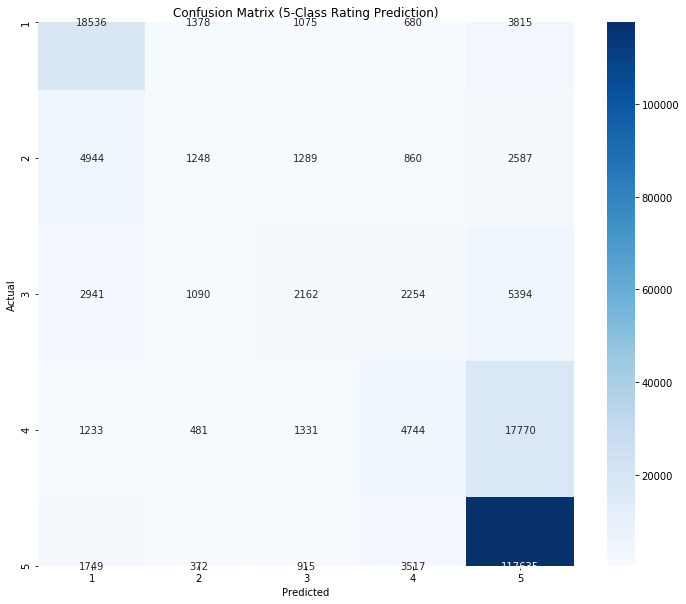

In [30]:
# Visualization

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[1,2,3,4,5],
            yticklabels=[1,2,3,4,5])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (5-Class Rating Prediction)')
plt.show()


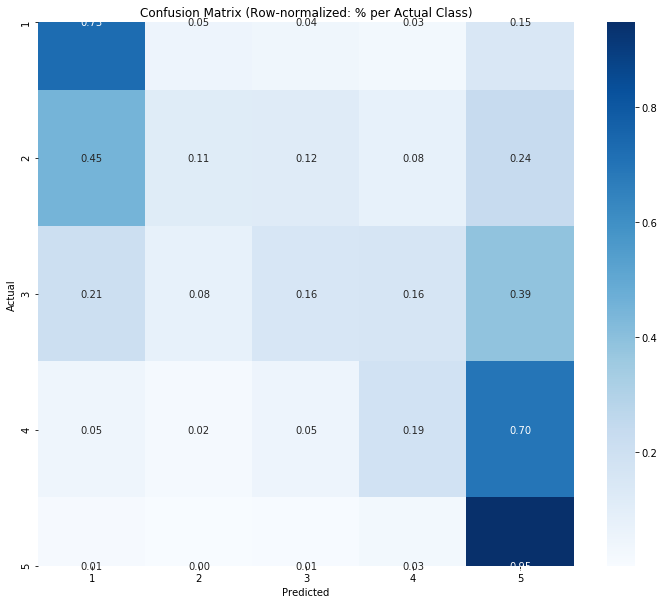

In [32]:
import numpy as np

# Raw confusion matrix (counts)
cm = confusion_matrix(y_test, y_pred, labels=[1,2,3,4,5])

# Normalize by row (actual class)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12,10))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=[1,2,3,4,5],
            yticklabels=[1,2,3,4,5])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Row-normalized: % per Actual Class)')
plt.show()


In [15]:
df_1m.shape

(1000000, 2)

In [14]:
df_1m.head()

,rating,clean_text
564406,5,i've been using the ipod nano 6th generation f...
185528,5,it was easy to set up
266126,2,the strap itself is nice wide enough to distri...
689939,4,dont like detach ley board
1289800,1,did not like it all


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Choose which dataframe to use

df_model = df_1m

X = df_model["clean_text"]
y = df_model["rating"]

# Train test split (stratified by rating)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(
    max_features=100_000,
    ngram_range=(1, 2),
    stop_words="english"
)

X_train = vectorizer.fit_transform(X_train_raw)
X_test  = vectorizer.transform(X_test_raw)

X_train.shape, X_test.shape


((800000, 100000), (200000, 100000))

In [18]:
pip install xgboost lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [lightgbm]
Note: you may need to restart the kernel to use updated packages.


In [19]:
import time
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Boosting libraries
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [21]:
# Step 0
print("X_train shape:", X_train.shape)
print("X_test  shape:", X_test.shape)
print("y_train size:", y_train.shape[0])
print("y_test  size:", y_test.shape[0])

X_train shape: (800000, 100000)
X_test  shape: (200000, 100000)
y_train size: 800000
y_test  size: 200000


In [22]:
# For training speed on boosting models

max_boost_samples = 200_000

if X_train.shape[0] > max_boost_samples:
    rng = np.random.RandomState(42)
    idx_boost = rng.choice(X_train.shape[0], size=max_boost_samples, replace=False)
    X_train_boost = X_train[idx_boost]
    y_train_boost = y_train.iloc[idx_boost]
    print(f"\nBoosting models will train on a subset of {max_boost_samples} samples.")
else:
    X_train_boost = X_train
    y_train_boost = y_train
    print("\nBoosting models will train on the full training set.")


Boosting models will train on a subset of 200000 samples.


In [23]:
# 2. Define models (4 classic + 3 boosting = 7 total)

models = {
    "LogisticRegression": LogisticRegression(
        max_iter=1000,
        n_jobs=-1,
        multi_class="auto"
    ),
    "LinearSVC": LinearSVC(),
    "MultinomialNB": MultinomialNB(),
    "RandomForest": RandomForestClassifier(
        n_estimators=200,
        n_jobs=-1,
        random_state=42
    ),
    "GradientBoosting": GradientBoostingClassifier(
        n_estimators=150,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="multi:softmax",
        num_class=5, # ratings 1–5
        n_jobs=-1,
        tree_method="hist",
        eval_metric="mlogloss"
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=200,
        learning_rate=0.1,
        num_leaves=63,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="multiclass",
        n_jobs=-1
    ),
}


In [25]:
# Train & evaluate all models (PyCaret-style table)

results = []
fitted_models = {}

print("\nTraining & evaluating models...\n")

for name, model in models.items():
    print(f"Training {name}...")
    start = time.time()

    # Use smaller subset for heavy boosting models
    if name in ["RandomForest", "GradientBoosting", "XGBoost", "LightGBM"]:
        model.fit(X_train_boost, y_train_boost)
    else:
        model.fit(X_train, y_train)

    train_time = time.time() - start

    # Evaluate on full test set
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average="macro")
    weighted_f1 = f1_score(y_test, y_pred, average="weighted")

    results.append({
        "model": name,
        "accuracy": acc,
        "macro_f1": macro_f1,
        "weighted_f1": weighted_f1,
        "train_time_sec": train_time
    })

    fitted_models[name] = model

    print(f"{name:16s} | acc={acc:.4f} | macro_f1={macro_f1:.4f} | "
          f"weighted_f1={weighted_f1:.4f} | time={train_time:.1f}s")

# Put into a comparison table like PyCaret
results_df = pd.DataFrame(results).sort_values(
    by=["macro_f1", "accuracy"],
    ascending=False
).reset_index(drop=True)

print("\nModel comparison:")
display(results_df)


Training & evaluating models...

Training LogisticRegression...


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression | acc=0.7317 | macro_f1=0.4440 | weighted_f1=0.6873 | time=105.6s
Training LinearSVC...
LinearSVC        | acc=0.7216 | macro_f1=0.4330 | weighted_f1=0.6799 | time=110.7s
Training MultinomialNB...
MultinomialNB    | acc=0.7126 | macro_f1=0.3498 | weighted_f1=0.6344 | time=0.2s
Training RandomForest...
RandomForest     | acc=0.6935 | macro_f1=0.3060 | weighted_f1=0.5975 | time=642.1s
Training GradientBoosting...
GradientBoosting | acc=0.6831 | macro_f1=0.3223 | weighted_f1=0.5994 | time=1047.5s
Training XGBoost...


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]

In [33]:
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 1. Define models (4 classic + 3 boosting = 7 total)
models = {
    "LogisticRegression": LogisticRegression(
        max_iter=1000,
        n_jobs=-1,
        multi_class="auto"
    ),
    "LinearSVC": LinearSVC(),
    "MultinomialNB": MultinomialNB(),
    "RandomForest": RandomForestClassifier(
        n_estimators=200,
        n_jobs=-1,
        random_state=42
    ),
    "GradientBoosting": GradientBoostingClassifier(
        n_estimators=150,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="multi:softmax",
        num_class=5,   # 5 classes: labels 0..4 internally
        n_jobs=-1,
        tree_method="hist",
        eval_metric="mlogloss"
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=200,
        learning_rate=0.1,
        num_leaves=63,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="multiclass",
        num_class=5,   # also expects labels 0..4
        n_jobs=-1
    ),
}

# 2. Precompute 0-based labels for boosting models
#    XGBoost / LightGBM want labels in {0,1,2,3,4}

y_train_boost_0 = y_train_boost - 1

results = []
fitted_models = {}

print("\nTraining & evaluating models...\n")

for name, model in models.items():
    print(f"Training {name}...")
    start = time.time()

    # -----------------------
    # Fit model
    # -----------------------
    if name in ["RandomForest", "GradientBoosting"]:
        # heavy but OK with 1–5 labels
        model.fit(X_train_boost, y_train_boost)
        y_pred = model.predict(X_test)

    elif name in ["XGBoost", "LightGBM"]:
        # use 0–4 labels for training, then shift predictions back to 1–5
        model.fit(X_train_boost, y_train_boost_0)
        y_pred_0 = model.predict(X_test)
        y_pred = y_pred_0 + 1   # back to 1–5 to match y_test

    else:
        # lighter models use full train set, labels 1–5 are fine
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    train_time = time.time() - start

    # -----------------------
    # Evaluate on full test set (y_test still 1–5)
    # -----------------------
    acc = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average="macro")
    weighted_f1 = f1_score(y_test, y_pred, average="weighted")

    results.append({
        "model": name,
        "accuracy": acc,
        "macro_f1": macro_f1,
        "weighted_f1": weighted_f1,
        "train_time_sec": train_time
    })

    fitted_models[name] = model

    print(f"{name:16s} | acc={acc:.4f} | macro_f1={macro_f1:.4f} | "
          f"weighted_f1={weighted_f1:.4f} | time={train_time:.1f}s")

# 3. Summary table (PyCaret-style)
results_df = pd.DataFrame(results).sort_values(
    by=["macro_f1", "accuracy"],
    ascending=False
).reset_index(drop=True)

print("\nModel comparison:")
display(results_df)



Training & evaluating models...

Training LogisticRegression...


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, a

LogisticRegression | acc=0.7317 | macro_f1=0.4440 | weighted_f1=0.6873 | time=72.1s
Training LinearSVC...
LinearSVC        | acc=0.7216 | macro_f1=0.4330 | weighted_f1=0.6799 | time=103.4s
Training MultinomialNB...
MultinomialNB    | acc=0.7126 | macro_f1=0.3498 | weighted_f1=0.6344 | time=0.2s
Training RandomForest...
RandomForest     | acc=0.6935 | macro_f1=0.3060 | weighted_f1=0.5975 | time=594.8s
Training GradientBoosting...
GradientBoosting | acc=0.6831 | macro_f1=0.3223 | weighted_f1=0.5994 | time=1037.4s
Training XGBoost...
XGBoost          | acc=0.6949 | macro_f1=0.3424 | weighted_f1=0.6166 | time=344.7s
Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 4.410930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 829662
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 23929


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM         | acc=0.7191 | macro_f1=0.4168 | weighted_f1=0.6683 | time=170.4s

Model comparison:


,model,accuracy,macro_f1,weighted_f1,train_time_sec
0,LogisticRegression,0.731650,0.443991,0.687272,72.059047
1,LinearSVC,0.721625,0.433022,0.679902,103.375763
2,LightGBM,0.719105,0.416827,0.668265,170.403760
3,MultinomialNB,0.712600,0.349750,0.634382,0.153872
4,XGBoost,0.694865,0.342356,0.616591,344.701175
5,GradientBoosting,0.683140,0.322319,0.599424,1037.375645
6,RandomForest,0.693485,0.305957,0.597495,594.817530


In [26]:
!pip install transformers datasets accelerate -q

Using df_1m as source.
Total rows available: 1000000
Sampled down to 50000 rows for DistilBERT (stratified by rating).
Train size: 40000  | Test size: 10000


Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/var/folders/77/f89_y6b16_s4wkxxzwb5v33c0000gn/T/ipykernel_17479/2770755722.py:155: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Starting DistilBERT training...


/opt/miniconda3/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
100,1.123600
200,0.941000
300,0.855000
400,0.824900
500,0.812300
600,0.782800
700,0.755300
800,0.746100
900,0.799400
1000,0.766200


Training finished.

Train metrics: {'train_runtime': 1628.1392, 'train_samples_per_second': 24.568, 'train_steps_per_second': 3.071, 'total_flos': 1324744857600000.0, 'train_loss': 0.7303915428161621, 'epoch': 1.0}

HuggingFace eval on validation set:


/opt/miniconda3/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


{'eval_loss': 0.671759843826294, 'eval_accuracy': 0.7517, 'eval_macro_f1': 0.4789140809105521, 'eval_weighted_f1': 0.7208898039469341, 'eval_runtime': 116.0589, 'eval_samples_per_second': 86.163, 'eval_steps_per_second': 5.385, 'epoch': 1.0}

Evaluating on validation/test set with sklearn metrics...


/opt/miniconda3/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)



Classification report (ratings 1–5):

              precision    recall  f1-score   support

           1     0.6236    0.8218    0.7091      1274
           2     0.3482    0.0713    0.1184       547
           3     0.3462    0.3121    0.3283       692
           4     0.4748    0.2653    0.3404      1278
           5     0.8552    0.9464    0.8985      6209

    accuracy                         0.7517     10000
   macro avg     0.5296    0.4834    0.4789     10000
weighted avg     0.7141    0.7517    0.7209     10000



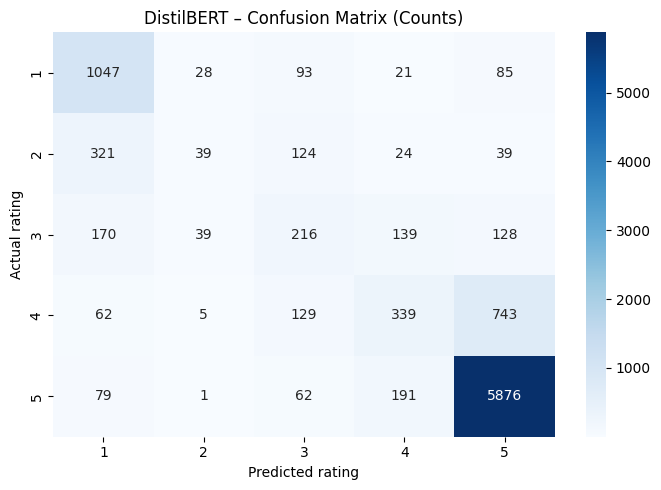

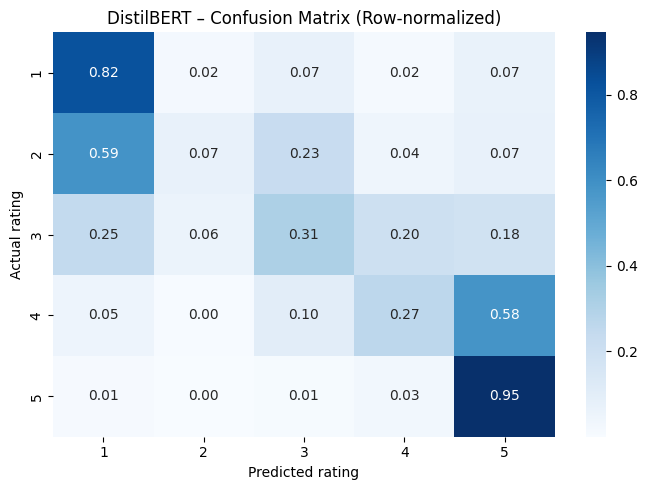

In [30]:
# !pip install transformers datasets accelerate -q

import pandas as pd
import numpy as np
import torch

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
)
from datasets import Dataset

# ----------------------------------------------------------
# 0. Choose source DataFrame (df_1m preferred, else df_final)
# ----------------------------------------------------------
try:
    df_source = df_1m.copy()
    print("Using df_1m as source.")
except NameError:
    df_source = df_final.copy()
    print("Using df_final as source.")

# Expect columns: 'clean_text' and 'rating'
assert "clean_text" in df_source.columns, "clean_text column not found."
assert "rating" in df_source.columns, "rating column not found."

# Keep only needed columns
df_dl = df_source[["clean_text", "rating"]].dropna().copy()

# Filter ratings to 1..5 just in case
df_dl = df_dl[df_dl["rating"].between(1, 5)]

print("Total rows available:", len(df_dl))

# ----------------------------------------------------------
# 1. Sample for DistilBERT (deep learning is heavy)
#    Use train_test_split for stratified downsampling
# ----------------------------------------------------------
sample_size = 50_000  # adjust: 50_000 / 100_000 / 200_000 depending on speed

if len(df_dl) > sample_size:
    df_dl_sampled, _ = train_test_split(
        df_dl,
        train_size=sample_size,
        stratify=df_dl["rating"],
        random_state=42,
    )
    df_dl = df_dl_sampled.reset_index(drop=True)
    print(f"Sampled down to {sample_size} rows for DistilBERT (stratified by rating).")
else:
    df_dl = df_dl.reset_index(drop=True)
    print("Using full dataset for DistilBERT.")

# Map rating 1–5 -> labels 0–4 (what the model will use internally)
df_dl["label"] = df_dl["rating"] - 1

# ----------------------------------------------------------
# 2. Train/test split
# ----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    df_dl["clean_text"],
    df_dl["label"],
    test_size=0.2,
    random_state=42,
    stratify=df_dl["label"],
)

print("Train size:", len(X_train), " | Test size:", len(X_test))

# Build HF Datasets
train_dataset = Dataset.from_pandas(
    pd.DataFrame({"text": X_train.values, "label": y_train.values})
)
valid_dataset = Dataset.from_pandas(
    pd.DataFrame({"text": X_test.values, "label": y_test.values})
)

# ----------------------------------------------------------
# 3. Tokenizer & tokenization
# ----------------------------------------------------------
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_batch(batch):
    return tokenizer(
        batch["text"],
        padding="max_length",
        truncation=True,
        max_length=128,  # 128 is a good tradeoff for speed vs info
    )

train_tok = train_dataset.map(tokenize_batch, batched=True, remove_columns=["text"])
valid_tok = valid_dataset.map(tokenize_batch, batched=True, remove_columns=["text"])

train_tok.set_format(
    type="torch", columns=["input_ids", "attention_mask", "label"]
)
valid_tok.set_format(
    type="torch", columns=["input_ids", "attention_mask", "label"]
)

# ----------------------------------------------------------
# 4. Load DistilBERT model
# ----------------------------------------------------------
num_labels = 5  # ratings 1–5 -> labels 0–4
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels,
)

# ----------------------------------------------------------
# 5. Define metrics
# ----------------------------------------------------------
id2label = {i: str(i + 1) for i in range(num_labels)}
label2id = {v: k for k, v in id2label.items()}

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)

    acc = accuracy_score(labels, preds)
    macro = f1_score(labels, preds, average="macro")
    weighted = f1_score(labels, preds, average="weighted")

    return {
        "accuracy": acc,
        "macro_f1": macro,
        "weighted_f1": weighted,
    }

# ----------------------------------------------------------
# 6. TrainingArguments & Trainer (simplified for older transformers)
# ----------------------------------------------------------
batch_size = 8  # lower if you hit memory issues

training_args = TrainingArguments(
    output_dir="./distilbert_amazon_ratings",
    num_train_epochs=1,                     # start with 1 epoch
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size * 2,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./distilbert_logs",
    logging_steps=100,
    # older versions don't support evaluation_strategy/save_strategy/etc.
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tok,
    eval_dataset=valid_tok,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# ----------------------------------------------------------
# 7. Train DistilBERT
# ----------------------------------------------------------
print("Starting DistilBERT training...")
train_result = trainer.train()
trainer.save_model()

print("Training finished.\n")
print("Train metrics:", train_result.metrics)

# Optional: built-in HF eval
print("\nHuggingFace eval on validation set:")
eval_metrics = trainer.evaluate(valid_tok)
print(eval_metrics)

# ----------------------------------------------------------
# 8. Evaluate on test set (y_test) with sklearn
# ----------------------------------------------------------
print("\nEvaluating on validation/test set with sklearn metrics...")

pred_output = trainer.predict(valid_tok)
logits = pred_output.predictions
y_pred = np.argmax(logits, axis=-1)

# Map labels 0–4 back to ratings 1–5 for nice printing
y_test_ratings = y_test.values + 1
y_pred_ratings = y_pred + 1

print("\nClassification report (ratings 1–5):\n")
print(classification_report(y_test_ratings, y_pred_ratings, digits=4))

labels = [1, 2, 3, 4, 5]
cm = confusion_matrix(y_test_ratings, y_pred_ratings, labels=labels)

plt.figure(figsize=(7, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
)
plt.xlabel("Predicted rating")
plt.ylabel("Actual rating")
plt.title("DistilBERT – Confusion Matrix (Counts)")
plt.tight_layout()
plt.show()

cm_norm = cm.astype("float") / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(7, 5))
sns.heatmap(
    cm_norm,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
)
plt.xlabel("Predicted rating")
plt.ylabel("Actual rating")
plt.title("DistilBERT – Confusion Matrix (Row-normalized)")
plt.tight_layout()
plt.show()


# Accuracy = 75.17%

This already beats most of the classical models (LogReg / SVM / RandomForest ~ 70–72%).

DistilBERT learns language context, so this improvement is expected.


✔ Very strong

✔ DistilBERT correctly identifies most positive reviews

✔ High recall means: almost all true 5-star reviews are predicted correctly

✔ Largest class → model naturally learns it better

*“DistilBERT achieves strong performance overall (accuracy ~75%), outperforming traditional TF-IDF baselines by ~3–5%. The model performs extremely well on extreme sentiment (1-star and 5-star) where emotional cues are strong, achieving F1 scores of 0.71 and 0.90 respectively.

However, performance drops significantly for mid-range ratings (2- to 4-stars). This is expected in 5-class sentiment tasks because moderate reviews often lack strong linguistic signals that distinguish frustration from mild disappointment or satisfaction.

Macro-F1 (0.48) indicates difficulty on minority classes, while Weighted-F1 (0.72) reflects strong performance on the dominant 5-star class.”*

In [34]:
pip install --upgrade openai


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [openai]2m2/3 [openai]
Note: you may need to restart the kernel to use updated packages.


In [37]:
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt


# Choose source DataFrame

try:
    df_source = df_1m.copy()
    print("Using df_1m as source.")
except NameError:
    df_source = df_final.copy()
    print("Using df_final as source.")

assert "clean_text" in df_source.columns, "clean_text column not found."
assert "rating" in df_source.columns, "rating column not found."

# Keep only needed columns and drop NA
df_demo = df_source[["clean_text", "rating"]].dropna().copy()

# Ensure ratings are in 1..5
df_demo = df_demo[df_demo["rating"].between(1, 5)]

print("Total rows available:", len(df_demo))

# -----------------------------
# Take a stratified sample for demo
# -----------------------------
demo_size = 200   # adjust: 50, 100, 200, etc.

if len(df_demo) > demo_size:
    df_demo_sample, _ = train_test_split(
        df_demo,
        train_size=demo_size,
        stratify=df_demo["rating"],
        random_state=42
    )
    print(f"Stratified sample size: {len(df_demo_sample)}")
else:
    df_demo_sample = df_demo.copy()
    print("Using all rows as demo sample.")

df_demo_sample = df_demo_sample.reset_index(drop=True)
df_demo_sample.head()

Using df_1m as source.
Total rows available: 1000000
Stratified sample size: 200


,clean_text,rating
0,i was surprised that this sounds as good as th...,5
1,thies fixed my 30 year old dbx speakers now th...,5
2,i like these on a system with a sub they have ...,4
3,work great and very affordable i keep one in a...,5
4,great case does not come with a screen protect...,5


In [38]:
df_demo_sample.shape

(200, 2)

In [41]:
from openai import OpenAI
import json
import time

# -----------------------------
# OpenAI client
# -----------------------------
# Option A: set env var first in your terminal:
#   export OPENAI_API_KEY="sk-..."
# client = OpenAI()

API_KEY = "*"

# Option B: put key inline (less safe, but easy for demo)
client = OpenAI(api_key=API_KEY) 

model_name = "gpt-5-nano"   # or another mode


def classify_batch(reviews, model=model_name):
    """
    reviews: list[str] of review texts
    returns: list[int or None] predicted ratings 1..5
    """

    # Build numbered list of reviews
    reviews_block = ""
    for i, txt in enumerate(reviews):
        reviews_block += f"Review #{i}:\n{txt}\n\n"

    prompt = f"""
You are a strict sentiment rating assistant for Amazon product reviews.

For each review, assign a star rating from 1 to 5 using:
- 1 = very negative
- 2 = negative
- 3 = neutral or mixed
- 4 = positive
- 5 = very positive or enthusiastic

Return your answer as a JSON array of integers, where the i-th integer
is the rating for Review #i.

Example output:
[5, 3, 1, 4]

Now here are the reviews:

{reviews_block}

Remember: respond with ONLY a JSON array like [1, 2, 3, 4, 5].
"""

    response = client.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": "You assign star ratings to reviews."},
            {"role": "user", "content": prompt},
        ],
        #temperature=0,
    )

    content = response.choices[0].message.content.strip()
    # print("RAW:", content)  # uncomment to debug

    try:
        arr = json.loads(content)
    except Exception:
        # If parsing fails, return Nones
        return [None] * len(reviews)

    ratings = []
    for x in arr:
        try:
            r = int(x)
            if r in [1, 2, 3, 4, 5]:
                ratings.append(r)
            else:
                ratings.append(None)
        except Exception:
            ratings.append(None)

    # Pad / trim if lengths mismatch
    if len(ratings) < len(reviews):
        ratings += [None] * (len(reviews) - len(ratings))
    elif len(ratings) > len(reviews):
        ratings = ratings[:len(reviews)]

    return ratings


In [42]:
batch_size = 10   # 5–20 is usually a nice range
n = len(df_demo_sample)

llm_preds = [None] * n
texts = df_demo_sample["clean_text"].tolist()

for start in range(0, n, batch_size):
    end = min(start + batch_size, n)
    batch_texts = texts[start:end]

    print(f"Calling LLM for rows {start}–{end-1}...")
    ratings = classify_batch(batch_texts, model=model_name)

    for offset, r in enumerate(ratings):
        llm_preds[start + offset] = r

    # optional small sleep to avoid rate-limits
    time.sleep(0.2)

df_demo_sample["llm_rating"] = llm_preds

# See a few side-by-side
df_demo_sample[["clean_text", "rating", "llm_rating"]].head(10)


Calling LLM for rows 0–9...
Calling LLM for rows 10–19...
Calling LLM for rows 20–29...
Calling LLM for rows 30–39...
Calling LLM for rows 40–49...
Calling LLM for rows 50–59...
Calling LLM for rows 60–69...
Calling LLM for rows 70–79...
Calling LLM for rows 80–89...
Calling LLM for rows 90–99...
Calling LLM for rows 100–109...
Calling LLM for rows 110–119...
Calling LLM for rows 120–129...
Calling LLM for rows 130–139...
Calling LLM for rows 140–149...
Calling LLM for rows 150–159...
Calling LLM for rows 160–169...
Calling LLM for rows 170–179...
Calling LLM for rows 180–189...
Calling LLM for rows 190–199...


,clean_text,rating,llm_rating
0,i was surprised that this sounds as good as th...,5,4
1,thies fixed my 30 year old dbx speakers now th...,5,5
2,i like these on a system with a sub they have ...,4,3
3,work great and very affordable i keep one in a...,5,5
4,great case does not come with a screen protect...,5,4
5,great little drive,5,4
6,it delivers an excellent picture and is easy t...,4,4
7,it took about 15 minuets to set up but after i...,5,5
8,i use this tape player in my classroom for use...,4,4
9,videoid c882e75d561061219f52f29536829999 cutes...,5,5


Rows kept for evaluation: 200


,clean_text,rating,llm_rating
0,i was surprised that this sounds as good as th...,5,4
1,thies fixed my 30 year old dbx speakers now th...,5,5
2,i like these on a system with a sub they have ...,4,3
3,work great and very affordable i keep one in a...,5,5
4,great case does not come with a screen protect...,5,4



Classification report (LLM rating vs original rating):

              precision    recall  f1-score   support

           1     0.7273    0.3200    0.4444        25
           2     0.2353    0.7273    0.3556        11
           3     0.2353    0.2857    0.2581        14
           4     0.1918    0.5385    0.2828        26
           5     0.9538    0.5000    0.6561       124

    accuracy                         0.4800       200
   macro avg     0.4687    0.4743    0.3994       200
weighted avg     0.7366    0.4800    0.5367       200



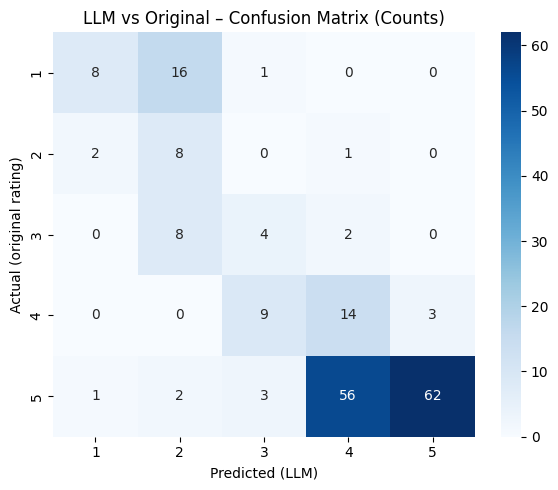

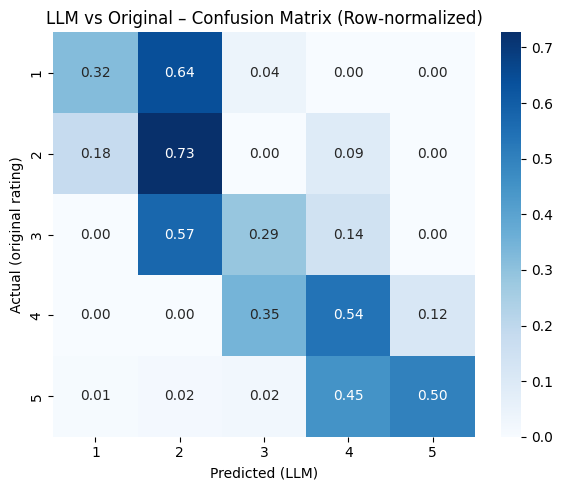

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# 1) Build df_eval from your current df_demo_sample

df_eval = df_demo_sample.dropna(subset=["llm_rating"]).copy()
df_eval["rating"] = df_eval["rating"].astype(int)
df_eval["llm_rating"] = df_eval["llm_rating"].astype(int)

print("Rows kept for evaluation:", len(df_eval))
display(df_eval[["clean_text", "rating", "llm_rating"]].head())

# 2) Extract y_true / y_pred
true_r = df_eval["rating"]
pred_r = df_eval["llm_rating"]

print("\nClassification report (LLM rating vs original rating):\n")
print(classification_report(true_r, pred_r, digits=4))

# 3) Confusion matrices
labels = [1, 2, 3, 4, 5]
cm = confusion_matrix(true_r, pred_r, labels=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
)
plt.xlabel("Predicted (LLM)")
plt.ylabel("Actual (original rating)")
plt.title("LLM vs Original – Confusion Matrix (Counts)")
plt.tight_layout()
plt.show()

cm_norm = cm.astype("float") / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_norm,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
)
plt.xlabel("Predicted (LLM)")
plt.ylabel("Actual (original rating)")
plt.title("LLM vs Original – Confusion Matrix (Row-normalized)")
plt.tight_layout()
plt.show()


In [45]:
df_demo_sample

,clean_text,rating,llm_rating
0,i was surprised that this sounds as good as th...,5,4
1,thies fixed my 30 year old dbx speakers now th...,5,5
2,i like these on a system with a sub they have ...,4,3
3,work great and very affordable i keep one in a...,5,5
4,great case does not come with a screen protect...,5,4
...,...,...,...
195,this was a perfect product to suit my needs ne...,5,5
196,these bands are a great price i had no issues ...,5,4
197,full time college study heavily used still rem...,5,4
198,i use this to take notes in class and organize...,5,4
